In [1]:
import torch
import os
import matplotlib.pyplot as plt
from utils.data_loader import get_dataloaders
from models.dense_baseline import get_baseline
from models.moe_model import MoEModel
from utils.visualization import HistoryLogger, plot_learning_curves, plot_expert_utilization, compare_params_vs_performance, plot_expert_heatmap
from train import train_baseline, train_moe

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

/home/arthur/miniconda3/envs/ML/lib/python3.12/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


Using device: cuda


In [2]:
# Load Data
# Using a reduced batch size if running on CPU, defaults to 128
batch_size = 64
train_loader, val_loader, test_loader, num_classes, img_size = get_dataloaders(batch_size=batch_size)

print(f"Num Classes: {num_classes}, Image Size: {img_size}")

Loaded CIFAR-10: 45000 train, 5000 val, 10000 test images.
Num Classes: 10, Image Size: (3, 32, 32)


In [3]:
# Configuration for the test run
epochs = 10
save_dir = './test_results'
os.makedirs(save_dir, exist_ok=True)

# 1. Train MoE Model (Top-1)
# print("=== Training MoE Model (Top-1) ===")
# moe_model_top1 = MoEModel(num_experts=4, num_classes=num_classes, input_channels=img_size[0], top_k=1).to(device)
# moe_top1_save_path = os.path.join(save_dir, 'moe_model_top1.pth')

# train_moe(moe_model_top1, train_loader, val_loader, test_loader, epochs, device, moe_top1_save_path, aux_weight=3.0)

In [4]:
# 1b. Train MoE Model (Top-2)
print("=== Training MoE Model (Top-2) ===")
moe_model_top2 = MoEModel(num_experts=4, num_classes=num_classes, input_channels=img_size[0], top_k=2).to(device)
moe_top2_save_path = os.path.join(save_dir, 'moe_model_top2.pth')

train_moe(moe_model_top2, train_loader, val_loader, test_loader, epochs, device, moe_top2_save_path, aux_weight=3.0)

=== Training MoE Model (Top-2) ===
Starting MoE training on cuda with aux_weight=3.0, Top-K=2


Epoch 1/10:  38%|███▊      | 270/704 [00:04<00:07, 60.78it/s, loss=2.22, acc=25.8]


KeyboardInterrupt: 

In [5]:
# 1b. Train MoE Model (Top-22)
print("=== Training MoE Model (Top-22) ===")
moe_model_top22 = MoEModel(num_experts=8, num_classes=num_classes, input_channels=img_size[0], top_k=2).to(device)
moe_top22_save_path = os.path.join(save_dir, 'moe_model_top22.pth')

train_moe(moe_model_top22, train_loader, val_loader, test_loader, epochs, device, moe_top22_save_path, aux_weight=12.0)

=== Training MoE Model (Top-22) ===
Starting MoE training on cuda with aux_weight=12.0, Top-K=2


Epoch 1/10: 100%|██████████| 704/704 [00:15<00:00, 45.70it/s, loss=1.97, acc=28.7]


Epoch 1: Train: 28.70% | Val: 35.24% | Test: 38.54%
   Usage: [E0:11.8% | E1:12.7% | E2:10.8% | E3:13.2% | E4:14.0% | E5:12.9% | E6:12.1% | E7:12.6%]


Epoch 2/10: 100%|██████████| 704/704 [00:15<00:00, 45.89it/s, loss=1.7, acc=38.3] 


Epoch 2: Train: 38.30% | Val: 39.30% | Test: 41.56%
   Usage: [E0:11.4% | E1:12.5% | E2:13.1% | E3:13.3% | E4:12.9% | E5:13.1% | E6:13.3% | E7:10.5%]


Epoch 3/10: 100%|██████████| 704/704 [00:15<00:00, 46.22it/s, loss=1.54, acc=44.7]


Epoch 3: Train: 44.68% | Val: 45.80% | Test: 48.12%
   Usage: [E0:10.4% | E1:12.3% | E2:13.7% | E3:13.0% | E4:13.6% | E5:13.4% | E6:13.1% | E7:10.4%]


Epoch 4/10: 100%|██████████| 704/704 [00:15<00:00, 44.95it/s, loss=1.44, acc=48.6]


Epoch 4: Train: 48.60% | Val: 52.24% | Test: 56.21%
   Usage: [E0:10.8% | E1:12.7% | E2:14.0% | E3:12.9% | E4:13.3% | E5:13.2% | E6:13.7% | E7:9.5%]


Epoch 5/10: 100%|██████████| 704/704 [00:15<00:00, 45.78it/s, loss=1.35, acc=52.4]


Epoch 5: Train: 52.40% | Val: 54.38% | Test: 56.80%
   Usage: [E0:11.5% | E1:11.4% | E2:14.1% | E3:12.9% | E4:13.0% | E5:13.4% | E6:12.8% | E7:10.9%]


Epoch 6/10: 100%|██████████| 704/704 [00:15<00:00, 45.89it/s, loss=1.25, acc=55.8]


Epoch 6: Train: 55.77% | Val: 58.16% | Test: 62.34%
   Usage: [E0:11.2% | E1:12.0% | E2:14.0% | E3:12.5% | E4:12.5% | E5:13.3% | E6:13.2% | E7:11.3%]


Epoch 7/10: 100%|██████████| 704/704 [00:15<00:00, 45.58it/s, loss=1.17, acc=59.1]


Epoch 7: Train: 59.07% | Val: 61.24% | Test: 63.51%
   Usage: [E0:11.6% | E1:11.8% | E2:14.2% | E3:12.4% | E4:12.1% | E5:13.3% | E6:13.1% | E7:11.4%]


Epoch 8/10: 100%|██████████| 704/704 [00:15<00:00, 45.89it/s, loss=1.06, acc=62.8]


Epoch 8: Train: 62.82% | Val: 63.42% | Test: 65.40%
   Usage: [E0:11.7% | E1:11.3% | E2:14.9% | E3:12.6% | E4:13.3% | E5:13.7% | E6:11.8% | E7:10.7%]


Epoch 9/10: 100%|██████████| 704/704 [00:15<00:00, 46.05it/s, loss=0.963, acc=66.4]


Epoch 9: Train: 66.39% | Val: 67.06% | Test: 69.14%
   Usage: [E0:11.9% | E1:11.7% | E2:15.3% | E3:12.9% | E4:13.5% | E5:13.2% | E6:11.3% | E7:10.2%]


Epoch 10/10: 100%|██████████| 704/704 [00:15<00:00, 45.67it/s, loss=0.899, acc=69.2]


Epoch 10: Train: 69.16% | Val: 70.00% | Test: 71.69%
   Usage: [E0:11.6% | E1:11.7% | E2:14.8% | E3:14.1% | E4:13.4% | E5:13.0% | E6:11.6% | E7:9.7%]
MoE Training finished. Final Test Accuracy: 71.69%


In [ ]:
# 2. Train Baseline (Width x1.0)
print("\n=== Training Baseline (Width x1.0) ===")
baseline_w1 = get_baseline(input_shape=img_size, num_classes=num_classes, width_multiplier=1.0).to(device)
baseline_w1_save_path = os.path.join(save_dir, 'baseline_w1.0.pth')

train_baseline(baseline_w1, train_loader, val_loader, test_loader, epochs, device, baseline_w1_save_path)

In [ ]:
# 3. Train Baseline (Width x2.0)
print("\n=== Training Baseline (Width x2.0) ===")
baseline_w2 = get_baseline(input_shape=img_size, num_classes=num_classes, width_multiplier=2.0).to(device)
baseline_w2_save_path = os.path.join(save_dir, 'baseline_w2.0.pth')

train_baseline(baseline_w2, train_loader, val_loader, test_loader, epochs, device, baseline_w2_save_path)

In [6]:
# Load Histories
# moe_top1_hist_path = moe_top1_save_path.replace('.pth', '_history.json')
# moe_top2_hist_path = moe_top2_save_path.replace('.pth', '_history.json')
moe_top22_hist_path = moe_top22_save_path.replace('.pth', '_history.json')
# base_w1_hist_path = baseline_w1_save_path.replace('.pth', '_history.json')
# base_w2_hist_path = baseline_w2_save_path.replace('.pth', '_history.json')

# history_moe_top1 = HistoryLogger.load(moe_top1_hist_path).history
# history_moe_top2 = HistoryLogger.load(moe_top2_hist_path).history
history_moe_top22 = HistoryLogger.load(moe_top22_hist_path).history
# history_base_w1 = HistoryLogger.load(base_w1_hist_path).history
# history_base_w2 = HistoryLogger.load(base_w2_hist_path).history

print("Histories loaded.")

Histories loaded.


In [ ]:
# Visualization: 4-Way Comparison
epochs_range = range(1, len(history_moe_top1['train_acc']) + 1)

plt.figure(figsize=(12, 6))

# Plot Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_moe_top1['val_acc'], label='MoE (Top-1)', linewidth=2, marker='o')
plt.plot(epochs_range, history_moe_top2['val_acc'], label='MoE (Top-2)', linewidth=2, marker='^', linestyle='--')
plt.plot(epochs_range, history_base_w1['val_acc'], label='Baseline (x1.0)', linestyle='--', marker='x')
plt.plot(epochs_range, history_base_w2['val_acc'], label='Baseline (x2.0)', linestyle='-.', marker='s')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_moe_top1['val_loss'], label='MoE (Top-1)', linewidth=2, marker='o')
plt.plot(epochs_range, history_moe_top2['val_loss'], label='MoE (Top-2)', linewidth=2, marker='^', linestyle='--')
plt.plot(epochs_range, history_base_w1['val_loss'], label='Baseline (x1.0)', linestyle='--', marker='x')
plt.plot(epochs_range, history_base_w2['val_loss'], label='Baseline (x2.0)', linestyle='-.', marker='s')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Visualization: Expert Utilization (Top-1 Model)
from IPython.display import Image, display

# Call the library function
plot_expert_utilization(HistoryLogger.load(moe_top1_hist_path), save_dir)

# Display the saved image
print("Expert Utilization Plot (Top-1):")
display(Image(filename=os.path.join(save_dir, 'expert_utilization_evolution.png')))

In [ ]:
# Visualization: Expert Utilization (Top-2 Model)
from IPython.display import Image, display

# Call the library function
plot_expert_utilization(HistoryLogger.load(moe_top2_hist_path), save_dir)

# Display the saved image
print("Expert Utilization Plot (Top-2):")
display(Image(filename=os.path.join(save_dir, 'expert_utilization_evolution.png')))

In [ ]:
# Visualization: Parameters vs Performance (Storage vs Compute)

def count_total_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def count_active_params_moe(model):
    # Active = Router + k * Expert
    router_params = sum(p.numel() for p in model.router.parameters())
    # Assuming all experts are identical, multiplied by k active experts
    expert_params = sum(p.numel() for p in model.experts[0].parameters())
    return router_params + (expert_params * model.top_k)

def plot_scatter(data, title, xlabel, save_name):
    plt.figure(figsize=(10, 7))
    for m in data:
        plt.scatter(m['params'], m['accuracy'], s=100, label=m['name'])
        # Add a small offset to text so it doesn't overlap the dot
        plt.text(m['params'], m['accuracy'], f"  {m['name']}", fontsize=9, va='center')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Test Accuracy (%)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, save_name))
    plt.show()

# 1. Prepare Data for Storage (Total Parameters)
# Shows memory footprint
storage_data = [
    {
        'name': 'MoE (Top-1)',
        'params': count_total_params(moe_model_top1),
        'accuracy': history_moe_top1['val_acc'][-1]
    },
    {
        'name': 'MoE (Top-2)',
        'params': count_total_params(moe_model_top2),
        'accuracy': history_moe_top2['val_acc'][-1]
    },
    {
        'name': 'Baseline (x1.0)',
        'params': count_total_params(baseline_w1),
        'accuracy': history_base_w1['val_acc'][-1]
    },
    {
        'name': 'Baseline (x2.0)',
        'params': count_total_params(baseline_w2),
        'accuracy': history_base_w2['val_acc'][-1]
    }
]

# 2. Prepare Data for Compute (Active Parameters)
# Shows computational efficiency (FLOPs proxy)
compute_data = [
    {
        'name': 'MoE (Top-1)',
        'params': count_active_params_moe(moe_model_top1), # Router + 1 Expert
        'accuracy': history_moe_top1['val_acc'][-1]
    },
    {
        'name': 'MoE (Top-2)',
        'params': count_active_params_moe(moe_model_top2), # Router + 2 Experts
        'accuracy': history_moe_top2['val_acc'][-1]
    },
    {
        'name': 'Baseline (x1.0)',
        'params': count_total_params(baseline_w1), # Dense runs everything
        'accuracy': history_base_w1['val_acc'][-1]
    },
    {
        'name': 'Baseline (x2.0)',
        'params': count_total_params(baseline_w2), # Dense runs everything
        'accuracy': history_base_w2['val_acc'][-1]
    }
]

print("=== Plot 1: Accuracy vs Total Parameters (Storage Cost) ===")
print("Conclusion: MoE requires more memory (Storage), Top-2 same as Top-1.")
plot_scatter(storage_data, 'Accuracy vs. Total Parameters (Storage)', 'Total Parameters', 'acc_vs_storage.png')

print("\n=== Plot 2: Accuracy vs Active Parameters (Inference Cost) ===")
print("Conclusion: MoE is strictly more efficient. Top-2 costs 2x expert compute of Top-1.")
plot_scatter(compute_data, 'Accuracy vs. Active Parameters (FLOPs Proxy)', 'Active Parameters', 'acc_vs_compute.png')

In [8]:
# Visualization: Expert Loss Evolution (Top-1 Model)
import numpy as np

def plot_expert_loss_history(history, title_suffix=""):
    if 'expert_loss' not in history or not history['expert_loss']:
        print("No expert loss data found.")
        return
        
    expert_losses = np.array(history['expert_loss']) # (Epochs, Num_Experts)
    epochs = range(1, expert_losses.shape[0] + 1)
    num_experts = expert_losses.shape[1]
    
    plt.figure(figsize=(10, 6))
    for i in range(num_experts):
        plt.plot(epochs, expert_losses[:, i], label=f'Expert {i}')
        
    plt.title(f'Expert Loss Evolution {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# print("Plotting Expert Loss for MoE Top-1...")
# plot_expert_loss_history(history_moe_top1, "(Top-1)")

In [9]:
# Visualization: Expert Specialization Heatmap (from History)
import seaborn as sns

def plot_expert_heatmap_from_history(history, title_suffix=""):
    if 'expert_class_distribution' not in history or not history['expert_class_distribution']:
        print("No expert class distribution data found.")
        return
        
    # Get last epoch distribution
    # Shape: (Num_Experts, Num_Classes)
    final_dist = np.array(history['expert_class_distribution'][-1]) 
    
    # Normalize per class (columns) to see which expert dominates a class
    # Add epsilon to avoid divide by zero
    col_sums = final_dist.sum(axis=0, keepdims=True)
    col_sums[col_sums == 0] = 1.0
    heatmap_norm = final_dist / col_sums
    
    plt.figure(figsize=(15, 8))
    sns.heatmap(heatmap_norm, cmap="viridis", cbar_kws={'label': 'Probability'})
    plt.title(f'Expert Specialization by Class (Last Epoch) {title_suffix}')
    plt.xlabel('CIFAR-10 Classes')
    plt.ylabel('Expert ID')
    plt.tight_layout()
    plt.show()

# print("Plotting Expert Specialization for MoE Top-1...")
# plot_expert_heatmap_from_history(history_moe_top1, "(Top-1)")

In [ ]:
# Visualization for Top-2 Model
print("Plotting Expert Loss for MoE Top-2...")
plot_expert_loss_history(history_moe_top2, "(Top-2)")

print("Plotting Expert Specialization for MoE Top-2...")
plot_expert_heatmap_from_history(history_moe_top2, "(Top-2)")

Plotting Expert Loss for MoE Top-22...


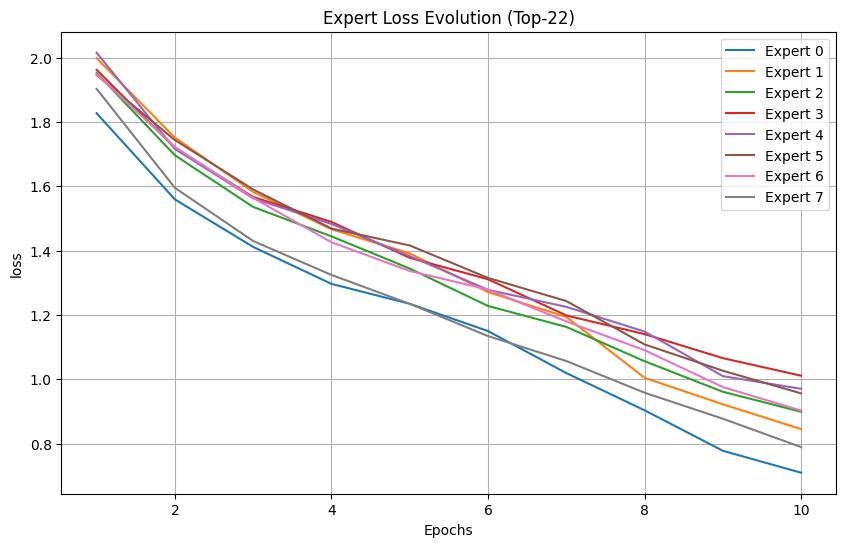

Plotting Expert Specialization for MoE Top-22...


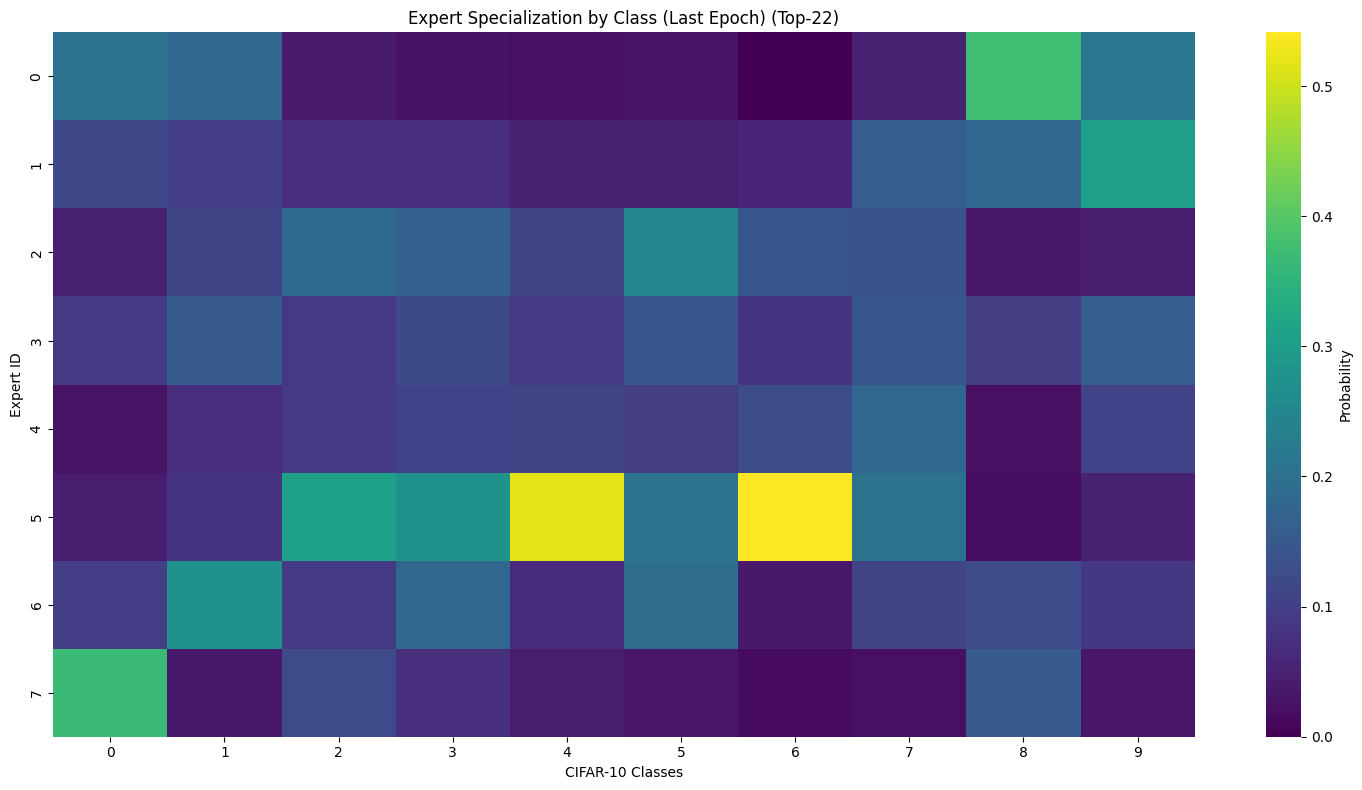

In [10]:
# Visualization for Top-2 Model
print("Plotting Expert Loss for MoE Top-22...")
plot_expert_loss_history(history_moe_top22, "(Top-22)")

print("Plotting Expert Specialization for MoE Top-22...")
plot_expert_heatmap_from_history(history_moe_top22, "(Top-22)")